In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data=pd.read_csv('/content/1.04.+Real-life+example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0
Model,0


Since null values are less than 5% of total values, directly drop the null values

In [ ]:
data=data.dropna()
data.isnull().sum()

,0
Brand,0
Price,0
Body,0
Mileage,0
EngineV,0
Engine Type,0
Registration,0
Year,0
Model,0


In [ ]:
data.shape

(4025, 9)

In [ ]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Dealing with Outliers

<Axes: xlabel='Price', ylabel='Density'>

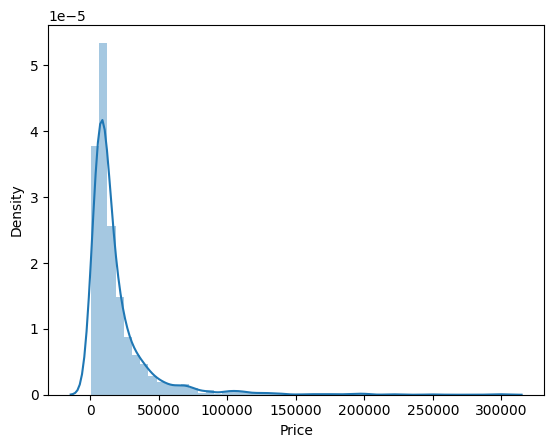

In [ ]:
sns.distplot(data['Price'])

In [ ]:
q=data['Price'].quantile(0.99)
data_1=data[data['Price']<q]
data_1.shape

(3984, 9)

<Axes: xlabel='Price', ylabel='Density'>

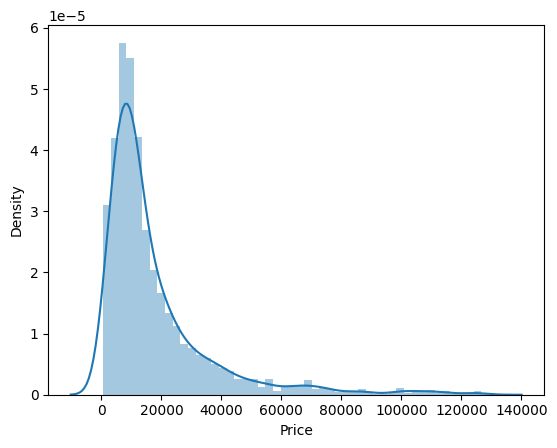

In [ ]:
sns.distplot(data_1['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

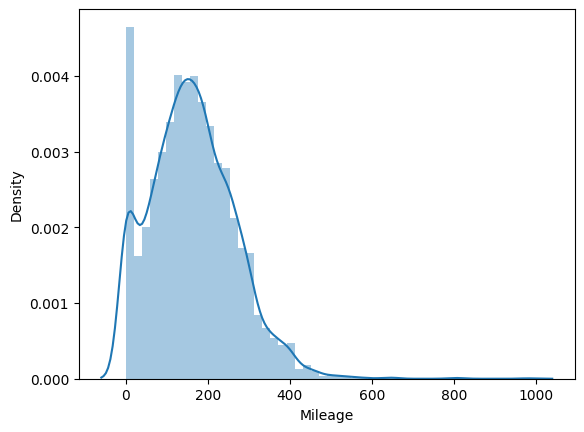

In [ ]:
sns.distplot(data['Mileage'])

In [ ]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2.shape

(3944, 9)

<Axes: xlabel='Mileage', ylabel='Density'>

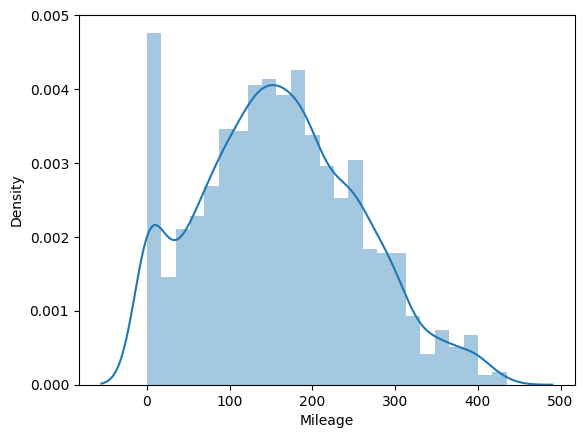

In [ ]:
sns.distplot(data_2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

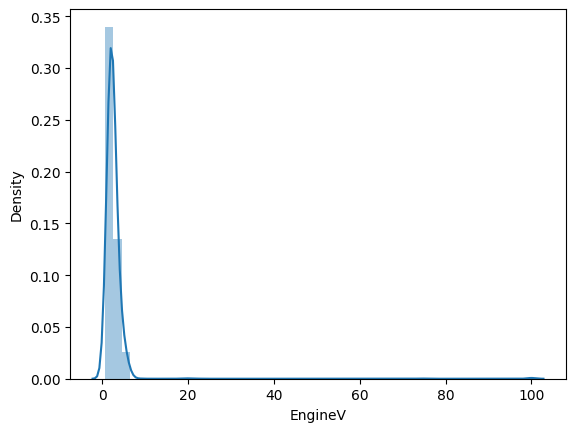

In [ ]:
sns.distplot(data['EngineV'])

In [ ]:
data_3=data_2[data_2['EngineV']<6.5]
data_3.shape

(3921, 9)

<Axes: xlabel='EngineV', ylabel='Density'>

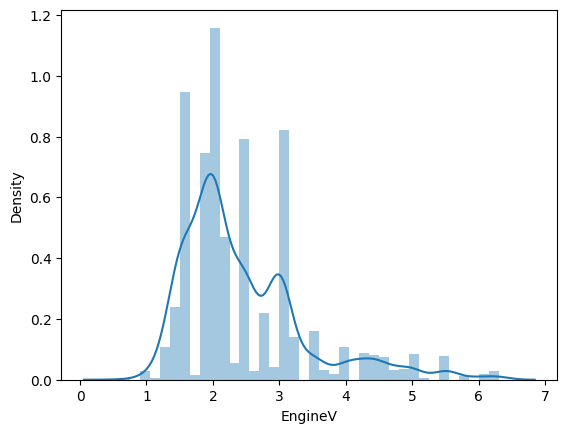

In [ ]:
sns.distplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

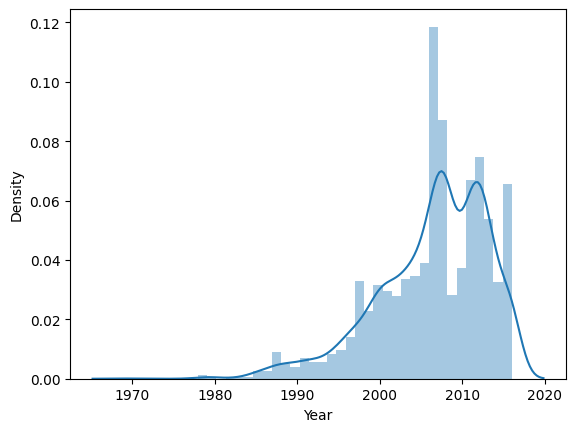

In [ ]:
sns.distplot(data['Year'])

In [ ]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
data_4.shape

(3867, 9)

<Axes: xlabel='Year', ylabel='Density'>

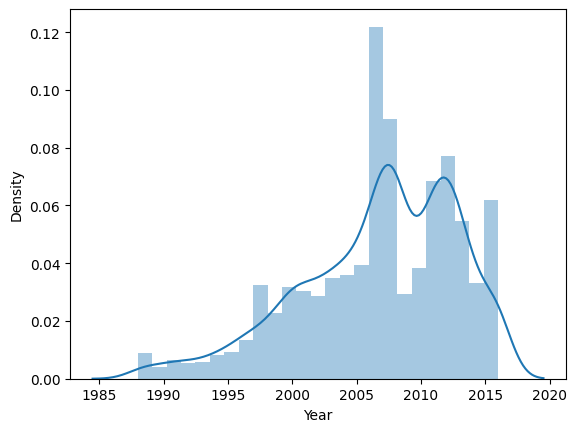

In [ ]:
sns.distplot(data_4['Year'])

In [ ]:
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
data_cleaned.drop(['Model'],axis=1,inplace=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


**Checking the OLS assumptions**

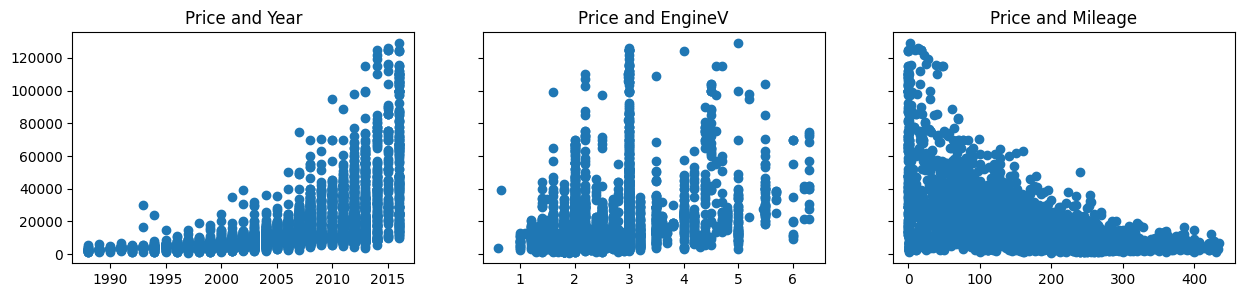

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [ ]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


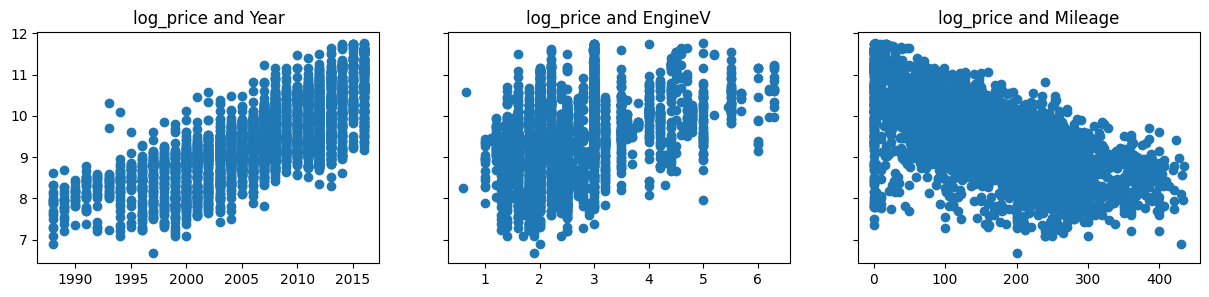

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [ ]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

**Multicollinearity**

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [ ]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

**Create dummy variables**
many variables together


In [ ]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [ ]:
data_with_dummies = data_with_dummies.replace({True: 1, False: 0})


In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen','Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']


In [ ]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Linear regression model
Declare the inputs and the targets

In [ ]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)

In [ ]:
inputs_scaled=scaler.transform(inputs)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

Create the regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat= reg.predict(x_train)

(6.0, 13.0)

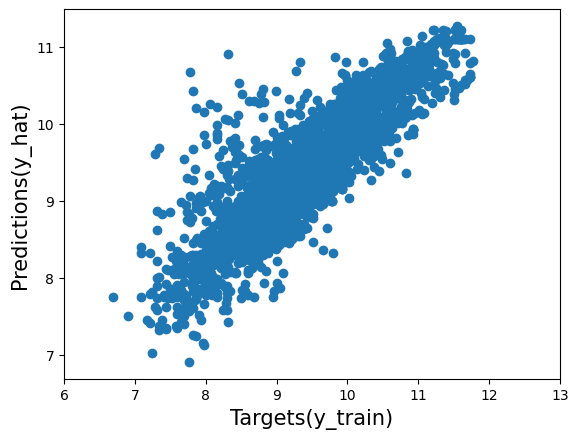

In [ ]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=15)
plt.ylabel('Predictions(y_hat)',size=15)
plt.xlim(6,13)

Text(0.5, 1.0, 'Residuals PDF')

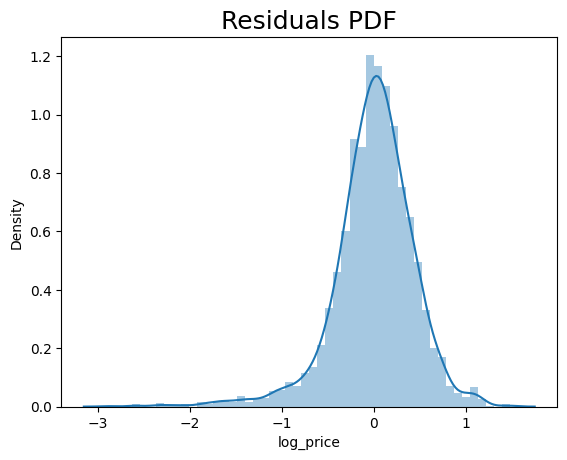

In [ ]:
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=18)

In [ ]:
reg.score(x_train,y_train)

0.744996578792662

Finding the weights and bias

In [ ]:
reg.intercept_

9.415239458021299

In [ ]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

Weights interpretation
A positive weight shows that as a feature increases in value, so the log_price and Price respectively. Bigger the Engine Volume  higher the **price**

In [ ]:
reg.summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg.summary['Weights']=reg.coef_
reg.summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [ ]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Testing

In [ ]:
y_hat_test=reg.predict(x_test)

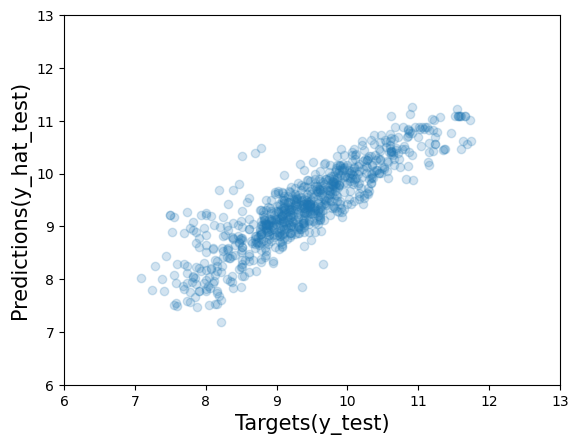

In [ ]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets(y_test)',size=15)
plt.ylabel('Predictions(y_hat_test)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [ ]:
df_pf['Targets']=np.exp(y_test)
df_pf.head()

,Predictions,Targets
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [ ]:
y_test=y_test.reset_index(drop=True)
y_test.head()

,log_price
0,7.740664
1,7.937375
2,7.824046
3,8.764053
4,9.121509


In [ ]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Targets,Target
0,10685.501696,NaN,2300.0
1,3499.255242,7900.0,2800.0
2,7553.285218,NaN,2500.0
3,7463.963017,NaN,6400.0
4,11353.490075,NaN,9150.0
...,...,...,...
769,29651.726363,6950.0,29500.0
770,10732.071179,NaN,9600.0
771,13922.446953,NaN,18300.0
772,27487.751303,NaN,68500.0


In [ ]:
df_pf=df_pf.drop(['Targets'],axis=1)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [ ]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf

,Predictions,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


In [ ]:
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [ ]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080
